# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations:
* As we would expect, temperatures becomes significantly warmer as one approaches the equator and much cooler as one moves away from the equator.
* The majority of cities show a wind speed <10 mph and the amount of cities disapate as the wind speed increase above 10 mph until the max wind spead of 40 mph.
* There does not appear to be a direct correlation between latitude and humidity, rather most cities appear to fall within a humidy level of 60-100%.

In [1]:
!conda env list

# conda environments:
#
base                     C:\Users\sgoodel3\Anaconda3
PythonData            *  C:\Users\sgoodel3\Anaconda3\envs\PythonData



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
url = base_url + weather_key

# create city list
city_data = []

#Perform weather check on each city usa a series of successive API calls.

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for index, city in enumerate(cities):
    if (index%50==0 and index>=50):
        record_count = 1 
        set_count = set_count + 1
        #stores the city for retrieval this needs to be inside the loop  
    query_url = url + "&q=" + city
    print("Processing Record %s of %s | %s" % (record_count, set_count, city))
    record_count = record_count + 1
    
    try:
        city_weather = requests.get(query_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass 
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")      


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | tiksi
Processing Record 2 of 1 | mirandopolis
Processing Record 3 of 1 | port lincoln
Processing Record 4 of 1 | aykhal
Processing Record 5 of 1 | izhma
Processing Record 6 of 1 | saint-philippe
Processing Record 7 of 1 | barranca
Processing Record 8 of 1 | nouadhibou
Processing Record 9 of 1 | carnarvon
Processing Record 10 of 1 | vardo
Processing Record 11 of 1 | mataura
Processing Record 12 of 1 | taolanaro
City not found. Skipping...
Processing Record 13 of 1 | mar del plata
Processing Record 14 of 1 | arroyo
Processing Record 15 of 1 | bredasdorp
Processing Record 16 of 1 | inhambane
Processing Record 17 of 1 | punta arenas
Processing Record 18 of 1 | tumannyy
City not found. Skipping...
Processing Record 19 of 1 | balkanabat
Processing Record 20 of 1 | airai
Processing Record 21 of 1 | tocopilla
Processing Record 22 of 1 | kavieng
Processing Record 23 of 1 | busselton
Processing Record 24 of 1 | sal

Processing Record 11 of 5 | pedra azul
Processing Record 12 of 5 | nong khai
Processing Record 13 of 5 | katsuura
Processing Record 14 of 5 | serabu
Processing Record 15 of 5 | honningsvag
Processing Record 16 of 5 | kavaratti
Processing Record 17 of 5 | palu
Processing Record 18 of 5 | aleksandrov gay
Processing Record 19 of 5 | esperance
Processing Record 20 of 5 | eldorado
Processing Record 21 of 5 | namikupa
Processing Record 22 of 5 | mendi
Processing Record 23 of 5 | saveh
Processing Record 24 of 5 | mamallapuram
Processing Record 25 of 5 | amderma
City not found. Skipping...
Processing Record 26 of 5 | scarborough
Processing Record 27 of 5 | hofn
Processing Record 28 of 5 | iqaluit
Processing Record 29 of 5 | bulawayo
Processing Record 30 of 5 | pakxan
Processing Record 31 of 5 | hornepayne
Processing Record 32 of 5 | muzaffarabad
Processing Record 33 of 5 | los llanos de aridane
Processing Record 34 of 5 | fontenay-le-comte
Processing Record 35 of 5 | erenhot
Processing Record 

Processing Record 22 of 9 | marfino
Processing Record 23 of 9 | omsukchan
Processing Record 24 of 9 | alofi
Processing Record 25 of 9 | zhigansk
Processing Record 26 of 9 | juba
Processing Record 27 of 9 | biak
Processing Record 28 of 9 | pringsewu
Processing Record 29 of 9 | balakhninskiy
Processing Record 30 of 9 | lichtenburg
Processing Record 31 of 9 | hays
Processing Record 32 of 9 | pacific grove
Processing Record 33 of 9 | margate
Processing Record 34 of 9 | george town
Processing Record 35 of 9 | grand river south east
City not found. Skipping...
Processing Record 36 of 9 | makakilo city
Processing Record 37 of 9 | meulaboh
Processing Record 38 of 9 | samalaeulu
City not found. Skipping...
Processing Record 39 of 9 | ahipara
Processing Record 40 of 9 | roma
Processing Record 41 of 9 | shubarkuduk
Processing Record 42 of 9 | san cristobal
Processing Record 43 of 9 | westport
Processing Record 44 of 9 | kilindoni
Processing Record 45 of 9 | arauca
Processing Record 46 of 9 | bajo

In [5]:
city_weather

{'coord': {'lon': -48.8494, 'lat': -27.2761},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 65.91,
  'feels_like': 69.71,
  'temp_min': 64.99,
  'temp_max': 66.99,
  'pressure': 1013,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 280, 'gust': 4},
 'clouds': {'all': 8},
 'dt': 1612666088,
 'sys': {'type': 3,
  'id': 2006264,
  'country': 'BR',
  'sunrise': 1612601561,
  'sunset': 1612649180},
 'timezone': -10800,
 'id': 3448906,
 'name': 'São João Batista',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-25.47,85,100,6.11,RU,1612665632
1,mirandopolis,-21.1336,-51.1017,66.54,76,0,5.66,BR,1612665937
2,port lincoln,-34.7333,135.8667,63.73,64,95,12.53,AU,1612665662
3,aykhal,66.0000,111.5000,-30.21,82,48,8.95,RU,1612665729
4,izhma,65.0083,53.9113,-32.04,82,100,10.13,RU,1612665937
...,...,...,...,...,...,...,...,...,...
574,ancud,-41.8697,-73.8203,62.60,45,0,10.36,CL,1612665665
575,pontianak,-0.0333,109.3333,82.40,78,75,11.50,ID,1612666087
576,marawi,7.9986,124.2928,81.00,83,56,5.99,PH,1612666088
577,henties bay,-22.1160,14.2845,64.00,90,17,4.00,NA,1612665655


In [7]:
# city_data_df.to_csv("city_data.csv")
len(city_data_df)

579

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
print(city_data_df['City'].where(city_data_df['Humidity'] > 100))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
574    NaN
575    NaN
576    NaN
577    NaN
578    NaN
Name: City, Length: 579, dtype: object


In [9]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.agg({'Humidity':['mean', 'median', 'var', 'std', 'max', 'min']})

,Humidity
mean,74.354059
median,78.000000
var,326.218716
std,18.061526
max,100.000000
min,15.000000


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df[~city_data_df["Humidity"] >100]



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data" 
city_data_df = city_data_df[~city_data_df["Humidity"] >100] 
clean_city_data = pd.DataFrame(city_data)
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-25.47,85,100,6.11,RU,1612665632
1,mirandopolis,-21.1336,-51.1017,66.54,76,0,5.66,BR,1612665937
2,port lincoln,-34.7333,135.8667,63.73,64,95,12.53,AU,1612665662
3,aykhal,66.0000,111.5000,-30.21,82,48,8.95,RU,1612665729
4,izhma,65.0083,53.9113,-32.04,82,100,10.13,RU,1612665937
...,...,...,...,...,...,...,...,...,...
574,ancud,-41.8697,-73.8203,62.60,45,0,10.36,CL,1612665665
575,pontianak,-0.0333,109.3333,82.40,78,75,11.50,ID,1612666087
576,marawi,7.9986,124.2928,81.00,83,56,5.99,PH,1612666088
577,henties bay,-22.1160,14.2845,64.00,90,17,4.00,NA,1612665655


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

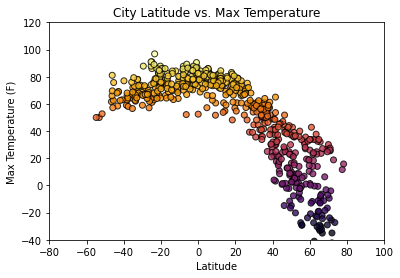

In [12]:
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Max Temp"], c=clean_city_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='inferno', alpha=0.8, label="City")

plt.title('City Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-80, 100])
plt.ylim([-40, 120])
plt.show()

## Latitude vs. Humidity Plot

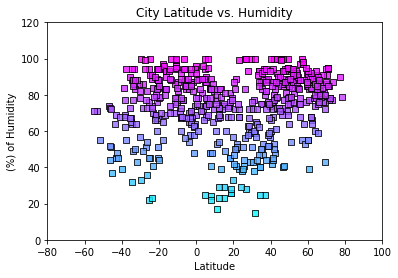

In [13]:
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Humidity"], c=clean_city_data["Humidity"],
            edgecolor="black", linewidths=1, marker="s", 
            cmap='cool', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('(%) of Humidity')
plt.title('City Latitude vs. Humidity')
plt.xlim([-80, 100])
plt.ylim([0, 120])
plt.show()

## Latitude vs. Cloudiness Plot

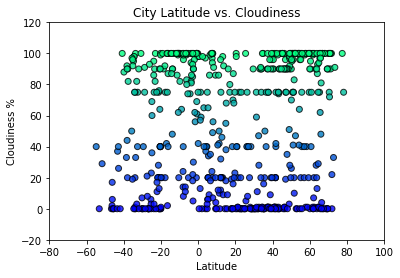

In [14]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Cloudiness"], c=clean_city_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='winter', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness')
plt.xlim([-80, 100])
plt.ylim([-20, 120])
plt.show()

## Latitude vs. Wind Speed Plot

(0.0, 60.0)

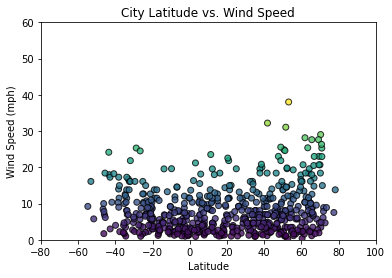

In [15]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Wind Speed"], c=clean_city_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='viridis', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.xlim([-80, 100])
plt.ylim([0, 60])

## Linear Regression

In [34]:
# Create Northern (Lat>0) and Southern Hemisphere (Lat<0) DataFrames
northern = clean_city_data.loc[clean_city_data['Lat'] >= 0.0]
northern.reset_index(inplace=True)

southern = clean_city_data.loc[clean_city_data['Lat'] < 0.0]
southern.reset_index(inplace=True)

# Create a function for plotting (plotLinearRegression)
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
 
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()
    
  


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8591135837808179


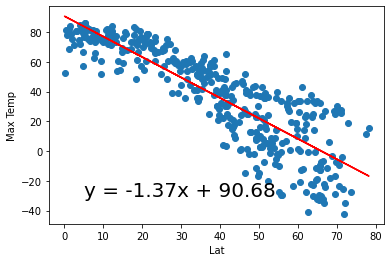

<Figure size 432x288 with 0 Axes>

In [38]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (5,-30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos)
plt.savefig("../output_data/fig1.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5504177813419859


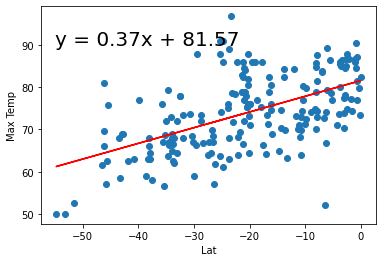

In [18]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3133350100935201


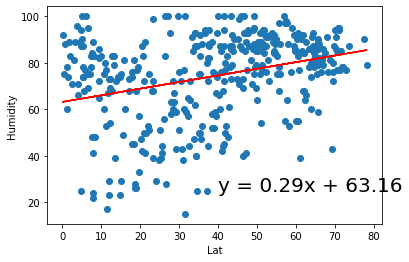

In [19]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2642693008679503


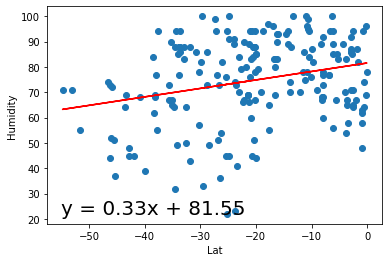

In [20]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,22)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2479793879409728


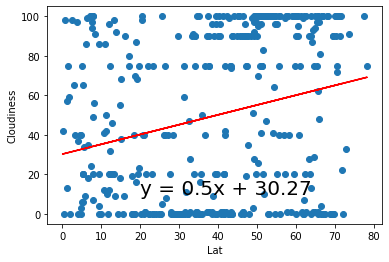

In [21]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3994780233047617


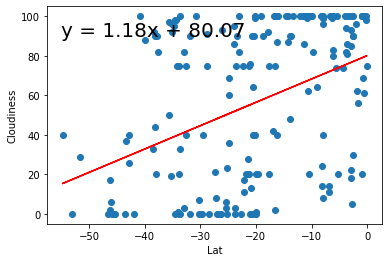

In [22]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21469035799607591


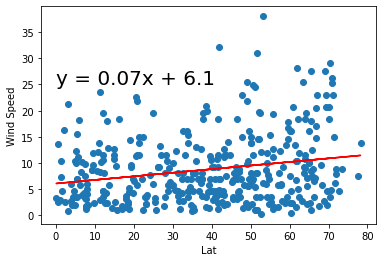

In [23]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.35624866982390013


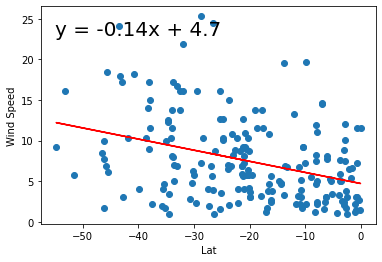

In [24]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-55,23)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos)